# Deep Learning and Neural Networks
Deep Learning is a subset of machine learning algorithms. It is based on neural networks and is capable of learning complex patterns within the data. It's advantage over simple machine learning methods lies in the fact that it can be built by stacking a number of layers of neurons to discover heirarchical patterns of featurese within the data. Thus, it should be able to extract more complex features not otherwise detected by simpler machine learning algorithms

<img src="https://developer.ibm.com/developer/default/articles/an-introduction-to-deep-learning/images/AI-ML-DL.png" width=240 height=240 />

Image source: [IBM Developer](https://developer.ibm.com/articles/an-introduction-to-deep-learning/)

## Neural Networks
The name "Neural Networks" comes from the structure of neurons in our brains, where multiple neurons connect to each other in layers to perform their respective functions. Although the similarity is vague, the name still catches on. To underestand this concept, let's start with explaining what is a neuron.

#### The Neuron
The basic building block of neural network is the neuron (sometimes called perceptron). It can be thought of as simple functions that take inputs and convert them to outputs. This conversion function is known as the activation function. In each neuron, the following steps take place:

* Take the from each variable in the input layer and multiply it by a factor (weight)
* Sum the product of inputs and weights and add a bias term (b)
* Apply a function (activation function) to the final sum

For the sake of understanding how a neuron works, let's assume we have a data for predicting the metastasis of a primary hepatic tumor. We collected four variables to be used for our task. These are the alpha fetoprotein (AFP), number of risk genes, alanine aminotransferase (ALT) and albumin level. The outcome for each patient is determined by an oncologist and is given in the column "Met.". The figure below shows how to use the input variables (coded $X_1$ to $X_4$) to compute the predicted output using one neuron. Each variable is multiplied by a particular weight ($W_1$ to $W_4$), and the product of these multiplications are summed. A bias term ($b$) is added at the end. Then, an activation function is used to convert the result of activation function to outpus (here, I used sigmoid function, but any other activation function should work).

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/dl_neuron.png" width=800 height=256 />

#### Activation Functions
There is a number of activation functions that are commonly used. These include the sigmoid function and rectified linear unit (ReLU) function. Other activation functions include the the sigmoid function, tanh function, leaky ReLU function, step function and others. For further information, please refer to [THIS WEBSITE](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6).

Sigmoid function is an S-shaped function that gives results between 0 and 1, and thus it is most appropriate when the outcome is binary. The ReLU function is a function that gives 0 for $x < 0$, and returns x when $x > 0$


<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/dl_activations.png" width=400 height=140 />

#### Building Neural Networks
The most basic form of neural networks consists of three layers: the input layer, a hidden layer and an output layer. In the hidden layer, neurons are arranged so that they receive input from the input layer and apply their activation functions on the input. The results are then passed to the output layer to give the final output.

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/dl_NN.png" width=800 height=266 />

#### Finding the Best Parameters
The final goal is to find the best parameters that make sure that the output of your network ($P(y)$ or $\hat{y}$) is as close as possible to the actual outcome ($y$). So, we first need a method to compute how far off we are in our prediction, and then we try to minimize this difference. This function is known as the loss function (also called cost function), and there are many loss functions out there. The simplest of which is the regression loss function, and is given by $L(\hat{y}, y) = y-\hat{y}$. Mean squared error (MSE) is another loss function that takes the square root of difference and finds the average of that. It is better in that it works regardless of the sign of difference (because of the squaring) and because it takes the error of all cases into account (by averaging). It is given by:

$$MSE(y,\hat{y}) = \frac{\sum_{i=0}^{n}(y-\hat{y})^2} {n}$$

Loss functions are used to validate the model and modify the weights and bias accordingly. The way it does that is through gradient descent, which basically updates the weights and bias so that the final result is closer to the actual outcome. This process is repeated a number of times until the loss function decreases and the best weights and bias are obtained.

<img src="https://raw.githubusercontent.com/abdulrahman1123/analysis_examples/main/dl_loss.png" width=400 height=210 />

---
### About the Dataset Used
This is a heart disease database, collected from pateints referred to the angiography clinic in Cleveland, US between 1981 and 1984. The original dataset consists of 76 variables. But most studies that used this dataset used a subset of 14, which we will use today. For futher information, please refer to the [this paper](https://pubmed.ncbi.nlm.nih.gov/2756873/)


---
# Neural Networks using Python
### 1. Import libraries and data and define functions

These are the functions that you will need for your following analyses. This line calls the libraries and functions written in the utils.py file. I kept these functions in another file just for simplicity. You can access it from [THIS LINK](https://github.com/abdulrahman1123/analysis_examples/blob/main/utils.py) if you need.


In [2]:
# Import data from ucimlrepo and take a look at the variables
from utils import *
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPClassifier

In [3]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
y = pd.DataFrame(np.where(y>0,1,0),columns = ['outcome'])

all_data = pd.concat([X,y],axis = 1)

vars = heart_disease.variables
vars.iloc[2,4] = 'chest pain type (0:typical angina, 1:atypical angina, 2:non-anginal pain, 4:asymptomatic)'
vars.iloc[6,4] = 'resting ECG (0:normal, 1: ST-wae abnormality, 2: left ventricular hypertrophy)'
vars.iloc[10,4] = 'peak excercise ST-segment slope (0:upsloping, 1: flat, 2:downsloping)'
vars.iloc[12,4] = '3 = normal; 6 = fixed defect; 7 = reversable defect'
vars.iloc[13,2] = 'Categorical'
vars.iloc[13,0] = 'outcome'

vars.style.set_properties(subset=['description'], **{'width-min': '500px'})



,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,"chest pain type (0:typical angina, 1:atypical angina, 2:non-anginal pain, 4:asymptomatic)",None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the hospital),mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,"resting ECG (0:normal, 1: ST-wae abnormality, 2: left ventricular hypertrophy)",None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to rest,None,no


##### 1.1. Have a look at categorical and and integer data 

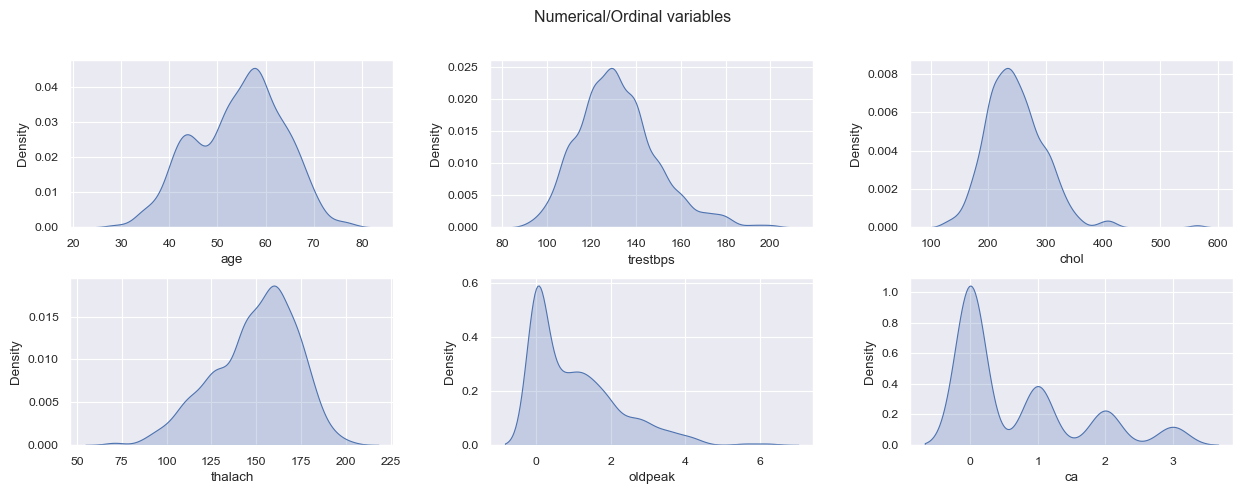

In [4]:
cats = vars.loc[np.array(vars == 'Categorical'),'name'].tolist()
ints = vars.loc[np.array(vars == 'Integer'),'name'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle("Numerical/Ordinal variables")
for i in range(len(ints)):
    row = i//3
    col = i-3*row
    col_name = ints[i]
    sns.kdeplot(ax = axes[row][col],data=all_data, x=col_name, fill = True,bw_adjust = 0.75)# try adding /hue='outcome'/
plt.subplots_adjust(wspace=0.3, hspace=0.3)


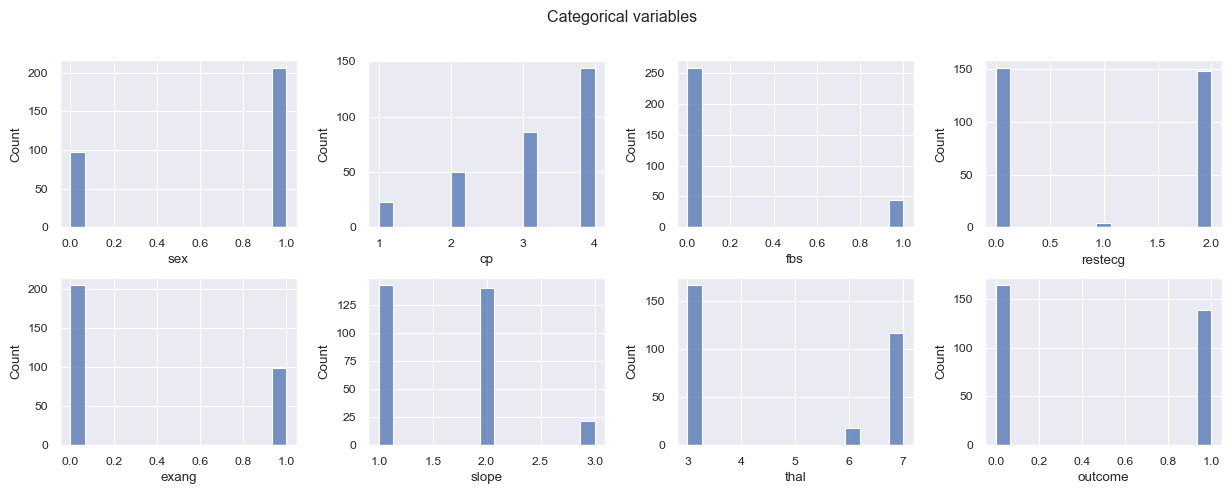

In [5]:
#all_data[cats].hist(bins = 10, figsize = (15,10), layout = (4,4), grid = False)

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
fig.suptitle("Categorical variables")
for i in range(len(cats)):
    row = i//4
    col = i-4*row
    col_name = cats[i]
    sns.histplot(ax = axes[row][col],data=all_data, x=col_name, bins = 15)# try adding /hue='outcome'/
plt.subplots_adjust(wspace=0.3, hspace=0.3)


##### 1.2. Convert categorical variables into dummy variables
This is done using the code pd.get_dummies() which converts each categorical variable into a number of variables each of them representing one of the categories as Yes/No

In [6]:
all_data_dum=pd.get_dummies(all_data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
all_data_dum.iloc[:,6::] = all_data_dum.iloc[:,6::].astype(int) # convert them to integers of 0/1
all_data_dum


,age,trestbps,chol,thalach,oldpeak,outcome,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68,144,193,141,3.4,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1.2,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,236,174,0.0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


### 
### 2. Create training and test datasets

The following generally applies for all machine learning algorithms:

The first step to do is to <b>split your data into training and testing datasets</b>. The training dataset will be used to train the model and evaluate parameters, while the testing dataset will only be used at the end to test how well did the model learn.

Imputing the data is not necessary for this dataset. However, if your dataset contains missing values, it might be worth imputing so that you do not miss any data point.

After that, the data will be normalized (mean = 0 and sd = 1) so that the model can coverge faster (i.e. reach the best solution faster).

Size of training dataset = (170, 28), Validation dataset = (57, 28) and testing dataset = (76, 28)


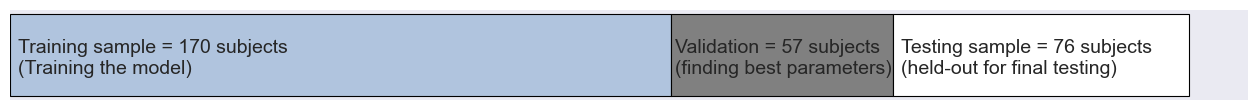

In [11]:
# Choose features
X = all_data_dum.loc[:,[item for item in all_data_dum.columns if item !="outcome"]]
y = all_data_dum.loc[:,'outcome']

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train.copy())
X_test = imp.transform(X_test.copy())
X_val = imp.transform(X_val.copy())

print(f"Size of training dataset = {X_train.shape}, Validation dataset = {X_val.shape} and testing dataset = {X_test.shape}")

# scale both X_train and X_test for faster convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

plot_train_test(X_train,X_test, X_val=X_val) # uncomment to show validation number

### 3. Compute MLP Model and Fit it to the Training Set
Create the model using the stochastic gradient descent, which is a method to find best parameters (See last section in the introduction to remind your self; there is no need to understand what is the math behind SGD solver for now).

In [33]:
solvers = ['adam', 'sgd']
activations = ['logistic', 'relu']

# Create a list of models. Append the four possible combinations of parameters
models = []
labels = []
val_accuracies = []
for solver in solvers:
    for activation in activations:
        model = MLPClassifier(hidden_layer_sizes=(128,128),max_iter=2000, activation = activation, solver=solver, n_iter_no_change=15, random_state=0,early_stopping=False)
        model.fit(X_train,y_train)
        models.append(model)

        # Append accuracy and label (for plotting)
        val_accuracies.append(np.round(model.score(X_val, y_val),3))
        labels.append([f'solver = {solver}, activation = {activation}'])



##### 3.1. Plot the Results

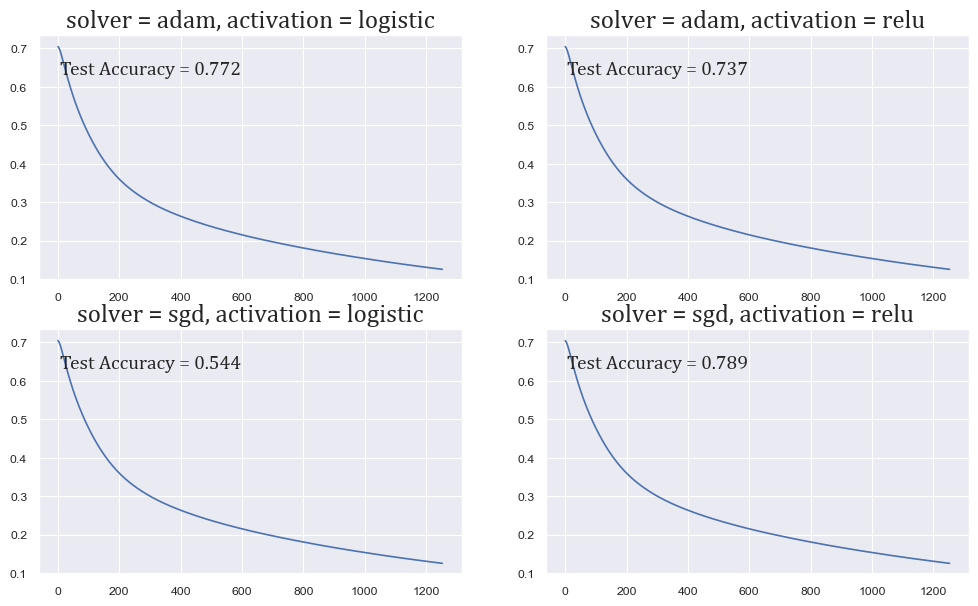

In [34]:
fig, axes = plt.subplots(2,2, figsize=(12, 7))
for ax, label, accuracy in zip(axes.ravel(), labels, val_accuracies):
    ax.set_title(label[0], font='Cambria', size=18)
    ax.plot(model.loss_curve_)
    ax.text(7,0.65, f'Test Accuracy = {accuracy}', font='Cambria', size=14, va='center_baseline')


##### 3.2. Show Accuracy Results

,Sensitivity,Specificity,Accuracy
0,0.821,0.854,0.842


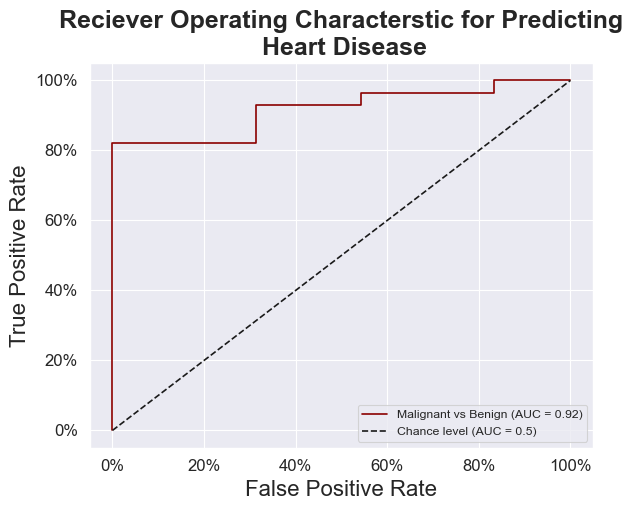

In [35]:
best_model = models[3]
best_model.probability = True
best_model.fit(X_train,y_train)

y_probas =best_model.predict_proba(X_test)[::,1]

_, ax = plt.subplots(figsize = (6.5,5))
RocCurveDisplay.from_predictions(y_test, y_probas,name="Malignant vs Benign", color="darkred", plot_chance_level=True,ax=ax)
plt.xlabel("False Positive Rate", fontsize = 16)
plt.ylabel("True Positive Rate", fontsize = 16)
ax.set_xticks(labels=['0%', '20%', '40%', '60%', '80%', '100%'], ticks=np.arange(0,1.1,0.2), fontsize = 12)
ax.set_yticks(labels=['0%', '20%', '40%', '60%', '80%', '100%'], ticks=np.arange(0,1.1,0.2), fontsize = 12)
plt.title("Reciever Operating Characterstic for Predicting\n Heart Disease", fontsize = 18,weight = 'bold')
plt.legend()

y_pred = model.predict(X_test) # This gives probabilities of y
y_pred_cat = np.where(y_pred>0.5,1,0) # This converts probabilities to either 0 or 1
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cat).ravel()
sens = tp / (tp + fn)
spec = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
pd.DataFrame(np.round([[sens, spec, accuracy]],3), columns=['Sensitivity', 'Specificity', 'Accuracy'])

---
### Further reading:
[IBM Developer website](https://developer.ibm.com/articles/an-introduction-to-deep-learning/)

[Activation Functions in Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

[Introduction to Deep Learning](https://www.geeksforgeeks.org/introduction-deep-learning/)

[Scikit-Learn Documentation of MLP Function](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
